Using simple Turing-type reaction-diffusion equations, this simulation shows how an intially symmetric space can undergo complex pattern formation.

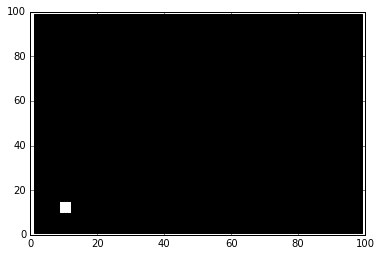

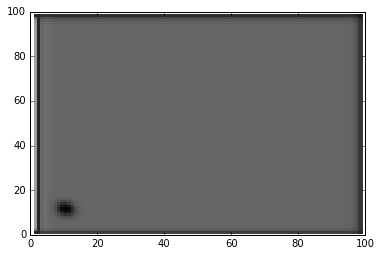

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import math

dA = 1
dB = 0.5
feed = 0.055
kill = 0.062

def setup(r):
    grid = np.zeros((r,r,2))
    next_grid = np.zeros((r,r,2))
    grid[:][:][0] = 1
    next_grid[:][:][0] = 1

    seed(grid, 10, 5)

    return grid, next_grid

def seed(grid, start, units):
    
    for i in range(units):
        value = start + i
        grid[start][value][1] = 1
        grid[start-1][value][1] = 1
        grid[start+1][value][1] = 1

def draw(current_grid, next_grid, r):
    for x in range(1, r-1):
        for y in range(1, r-1):
            #print y
            a = current_grid[x][y][0]
            b = current_grid[x][y][1]
            a_value = a + (dA * laplaceA(current_grid, x, y)) - (a * b * b) + (feed * (1-a))
            b_value = b + (dB * laplaceB(current_grid, x, y)) + (a * b * b) - ((kill + feed) * b)
            a_value = clamp(a_value, 0, 1)
            b_value = clamp(b_value, 0, 1)
            next_grid[x][y][0] = a_value
            next_grid[x][y][1] = b_value
    
    return next_grid

def swap(grid, next_grid):
    temp = grid
    grid = next_grid
    next_grid = temp
    
    return grid, next_grid
    
def laplaceA(current_grid, x, y):
    sumA = 0
    sumA += current_grid[x][y][0] * (-1)
    
    sumA += current_grid[x+1][y][0] * 0.2
    sumA += current_grid[x-1][y][0] * 0.2  
    sumA += current_grid[x][y+1][0] * 0.2
    sumA += current_grid[x][y-1][0] * 0.2
    
    sumA += current_grid[x+1][y+1][0] * 0.05
    sumA += current_grid[x+1][y-1][0] * 0.05
    sumA += current_grid[x-1][y+1][0] * 0.05
    sumA += current_grid[x-1][y+1][0] * 0.05
    
    return sumA

def laplaceB(current_grid,x,y):
    sumB = 0
    sumB += current_grid[x][y][1] * (-1)
    
    sumB += current_grid[x+1][y][1] * 0.2
    sumB += current_grid[x-1][y][1] * 0.2  
    sumB += current_grid[x][y+1][1] * 0.2
    sumB += current_grid[x][y-1][1] * 0.2
    
    sumB += current_grid[x+1][y+1][1] * 0.05
    sumB += current_grid[x+1][y-1][1] * 0.05
    sumB += current_grid[x-1][y+1][1] * 0.05
    sumB += current_grid[x-1][y+1][1] * 0.05
    
    return sumB

def clamp(n, minn, maxn):
    if n < minn:
        return minn
    elif n > maxn:
        return maxn
    else:
        return n
                
#test_grid, test_next = setup(50)
#next_one = draw(test_grid, test_next, 50)

def plot(next_grid, r):
    
    ax = plt.gca()
    
    for x in range(1, r-1):
        for y in range(1, r-1):
            a = next_grid[x][y][0]
            b = next_grid[x][y][1]
            gray_scale = a-b if a-b >= 0 else (-1)*(a-b)
            ax.add_patch(Rectangle((x, y), 1, 1, fill=True, color=str(gray_scale), alpha=1))
    plt.ylim(0,r)
    plt.xlim(0,r)
    plt.show()


def try_to_plot(time_steps, r):
    
    grid, next_grid = setup(r)
    
    plot(grid, r) #t=0
    
    for i in range(time_steps):
        
        print("time_step: ", i)
        
        next_grid = draw(grid, next_grid, r)
        plot(next_grid, r)
        
        grid, next_grid= swap(grid, next_grid)
        
        #seed(next_grid, i, 20)
        
        #plot(next_grid, 30)
        
    #plt.show()


init_grid, test_grid = setup(100)
plot(init_grid, 100)
for i in range(10):
    test_grid = draw(init_grid, test_grid, 100)
    init_grid, test_grid= swap(init_grid, test_grid)

plot(test_grid, 100)